In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import time
from ipywidgets import Output, HBox
from IPython.display import display, clear_output
from sklearn.datasets import make_blobs, load_diabetes
import pandas as pd
SEED = 42

# Supervised Learning

Supervised learning is a type of machine learning where the algorithm learns from labeled training data to make predictions or decisions without being explicitly programmed.

## Key Concepts

### 1. Training Data Structure
- **Input Features (X)**: The variables used to make predictions
- **Target Labels (Y)**: The correct answers we want to predict
- **Training Pairs**: Each data point consists of (input, target) pairs

# Types of Supervised Learning
## Regression vs Classification
## Regression
Regression predicts continuous numerical values as output. Think of it as answering "how much?" or "how many?"

### Examples of Regression:
- Predicting house prices
- Forecasting sales numbers
- Estimating a person's age
- Predicting temperature
- Determining salary based on experience

### Common Regression Algorithms:
- Linear Regression
- Polynomial Regression
- Random Forest Regression
- Support Vector Regression (SVR)

## Classification
Classification predicts discrete categories or labels as output. Think of it as answering "which category?" or "which class?"

### Examples of Classification:
- Spam vs non-spam email detection
- Disease diagnosis (positive/negative)
- Image recognition (cat/dog/bird)
- Customer churn prediction (will leave/will stay)
- Credit card fraud detection

### Common Classification Algorithms:
- Logistic Regression
- Decision Trees
- Random Forest Classification
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)

## Key Differences

| Aspect | Regression | Classification |
|--------|------------|----------------|
| Output Type | Continuous numbers | Discrete categories |
| Example Output | 42.5, 101.3, 15.7 | Yes/No, A/B/C |
| Error Measurement | Mean Squared Error, RMSE | Accuracy, Precision, Recall |
| Use Case | Predicting quantities | Categorizing items |

## Linear Regression and Classification

### Univariate linear regression

A univariate linear function (a straight line) with input $ x $ and output $ y $ has the form $ y = w_1x + w_0 $, where $ w_0 $ and $ w_1 $ are real-valued coefficients to be learned. We use the letter $ w $ because we think of the coefficients as **weights**; the value of $ y $ is changed by changing the relative weight of one term or another. We'll define $ w $ to be the vector $ (w_0, w_1) $, and define the linear function with those weights as

$
h_w(x) = w_1x + w_0. 
$

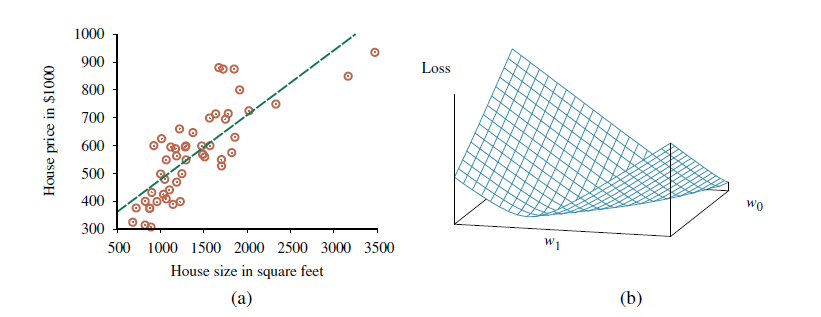

The figure shows an example of a training set of $ n $ points in the $ x, y $ plane, each point representing the size in square feet and the price of a house offered for sale. The task of finding the $ h_w $ that best fits these data is called linear regression. To fit a line to the data, all we have to do is find the values of the weights $ (w_0, w_1) $ that minimize the empirical loss. It is traditional to use the squared-error loss function, $ L_2 $, summed over all the training examples:

$\large
Loss(h_w) = \sum_{j=1}^{N} L_2(y_j, h_w(x_j)) = \sum_{j=1}^{N} (y_j - h_w(x_j))^2 = \sum_{j=1}^{N} (y_j - (w_1x_j + w_0))^2.
$

We would like to find $ w* = \arg\min_w Loss(h_w) $. The sum $\sum_{j=1}^{N} (y_j - (w_1x_j + w_0))^2$ is minimized when its partial derivatives with respect to $ w_0 $ and $ w_1 $ are zero:

$\large
\frac{\partial}{\partial w_0} \sum_{j=1}^{N} (y_j - (w_1x_j + w_0))^2 = 0 
$
and 
$
\frac{\partial}{\partial w_1} \sum_{j=1}^{N} (y_j - (w_1x_j + w_0))^2 = 0. 
$

These equations have a unique solution:

$\large
w_1 = \frac{N(\Sigma x_jy_j) - (\Sigma x_j)(\Sigma y_j)}{N(\Sigma x_j^2) - (\Sigma x_j)^2}; 
w_0 = \frac{\Sigma y_j - w_1(\Sigma x_j)}{N}. 
$

Many forms of learning involve adjusting weights to minimize a loss, so it helps to have a mental picture of what’s going on in weight space—the space defined by all possible settings of the weights. For univariate linear regression, the weight space defined by $ w_0 $ and $ w_1 $ is two-dimensional, so we can graph the loss as a function of $ w_0 $ and $ w_1 $ in a 3D plot.

The univariate linear model has the nice property that it is easy to find an optimal solution where the partial derivatives are zero. But that won’t always be the case, so we introduce here a method for minimizing loss that does not depend on solving to find zeroes of the derivatives, and can be applied to any loss function, no matter how complex.
We can search through a continuous weight space by incrementally modifying the parameters minimizing the loss, with a method called **Gradient descent**. We choose any starting point in weight space—here, a point in the (w0, w1) plane—and then compute an estimate of the gradient and move a small amount in the steepest downhill direction, repeating until we converge on a point in weight space with (local) minimum loss.

The algorithm is as follows:

**w** ← any point in the parameter space  
**while** not converged **do:**  
&nbsp;&nbsp;&nbsp;&nbsp;**for each** $w_i $ **in** **w** **do:**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w_i \leftarrow w_i - \alpha \frac{\partial}{\partial w_i} Loss(w) $  (1)


The parameter $\alpha $, is usually called the **learning rate** when we are trying to minimize loss in a learning problem. It can be a fixed constant, or it can vary over time as the learning process proceeds.

For univariate regression, the loss is quadratic, so the partial derivative will be linear. (The only calculus you need to know is the **chain rule**: $\frac{\partial}{\partial x} g(f(x)) = g'(f(x)) \frac{\partial}{\partial x} f(x) $, plus the facts that $\frac{\partial}{\partial x} x^2 = 2x $ and $\frac{\partial}{\partial x} x = 1 $.) Let’s first work out the partial derivatives—the slopes—in the simplified case of only one training example, $(x, y)$:

$\large
\frac{\partial}{\partial w_i} Loss(w) = \frac{\partial}{\partial w_i} (y - h_w(x))^2 = 2(y - h_w(x)) \times \frac{\partial}{\partial w_i} (y - h_w(x))
$ 

$\large
= 2(y - h_w(x)) \times \frac{\partial}{\partial w_i} (y - (w_1x + w_0)). 
$ 
(2)


Applying this to both $w_0 $ and $w_1 $ we get:

$\large
\frac{\partial}{\partial w_0} Loss(w) = -2(y - h_w(x)); \quad \frac{\partial}{\partial w_1} Loss(w) = -2(y - h_w(x)) \times x.
$ (3)

Plugging this into Equation (1), and folding the 2 into the unspecified learning rate $\alpha $, we get the following learning rule for the weights:

$\large
w_0 \leftarrow w_0 + \alpha (y - h_w(x)); \quad w_1 \leftarrow w_1 + \alpha (y - h_w(x)) \times x.
$ 

These updates make intuitive sense: if $h_w(x) > y $ (i.e., the output is too large), reduce $w_0 $ a bit, and reduce $w_1 $ if $x $ was a positive input but increase $w_1 $ if $x $ was a negative input.

The preceding equations cover one training example. For N training examples, we want
to minimize the sum of the individual losses for each example. The derivative of a sum is the
sum of the derivatives, so we have:

$\large
w_0 \leftarrow w_0 + \alpha \sum_j (y_j - h_w(x_j)); 
w_1 \leftarrow w_1 + \alpha \sum_j (y_j - h_w(x_j)) \times x_j.
$ 

In [4]:
def f(x):
    return 3 * x**2 - 4 * x + 5

In [5]:
def f1(x):
    return 6 * x - 4

In [6]:
print(f1(3.0))

14.0


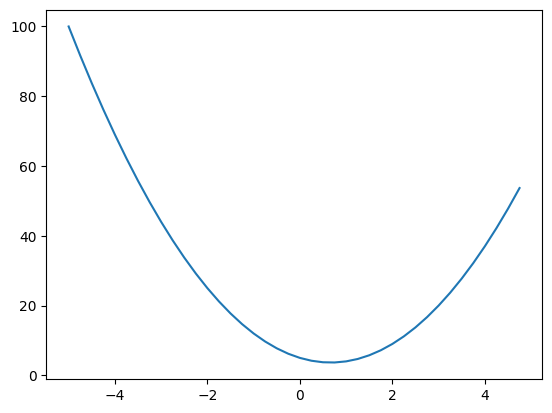

In [7]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [9]:
h = 0.000001
x = 2/3
print((f(x + h) - f(x)) / h)

2.999378523327323e-06


In [10]:
print(f1(-2))

-16


In [11]:
f(2/3)

3.666666666666667

In [12]:
def g(x1, x2):
    return x1**2 + x2**4

In [13]:
print(g(0, 0))

0


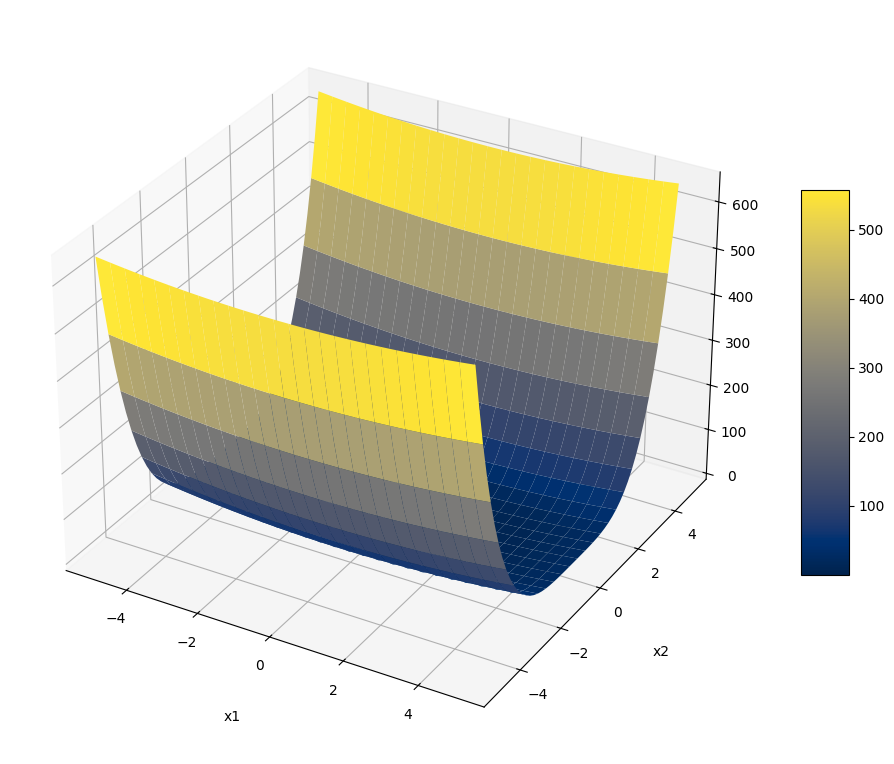

In [14]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection="3d")

X1 = np.arange(-5, 5.1, 0.2)
X2 = np.arange(-5, 5.1, 0.2)

X1, X2 = np.meshgrid(X1, X2)
Y = g(X1, X2)

surf = ax.plot_surface(X1, X2, Y, cmap=plt.cm.cividis)

# Set axes label
ax.set_xlabel("x1", labelpad=20)
ax.set_ylabel("x2", labelpad=20)
ax.set_zlabel("y", labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [15]:
print(g(5, -5))

650


  0%|          | 0/10000 [00:00<?, ?it/s]

0.6765410763886508 -0.3526029247165862


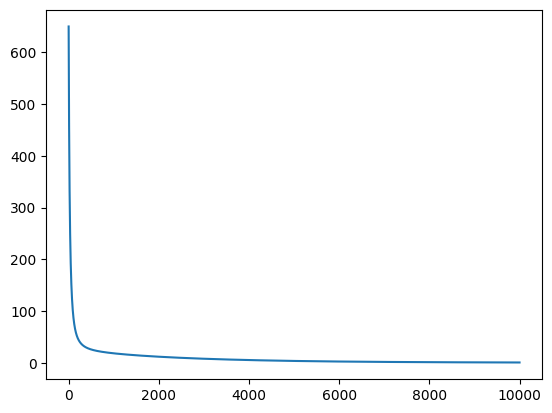

In [16]:
lr = 0.0001
x1 = 5
x2 = -5

def g1(x1):
    return 2 * x1

def g2(x2):
    return 4 * x2**3


values = []
for i in tqdm(range(10000)):
    values.append(g(x1, x2))
    x1 -= lr * g1(x1)
    x2 -= lr * g2(x2)
values.append(g(x1, x2))

print(x1, x2)
plt.plot(values)
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

0.6753226142802671 -0.3519642383492627


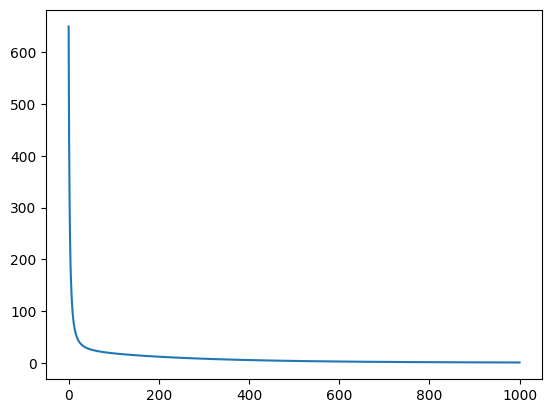

In [17]:
lr = 0.001
x1 = 5
x2 = -5
h = 1e-8


values = []
for i in tqdm(range(1000)):
    values.append(g(x1, x2))
    x1 -= lr * (g(x1 + h, x2) - g(x1, x2)) / h
    x2 -= lr * (g(x1, x2 + h) - g(x1, x2)) / h

values.append(g(x1, x2))

print(x1, x2)
plt.plot(values)
plt.show()

In [18]:
g(x1, x2)

0.47140659666073703

In [21]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = np.arange(start, end, step)
y = weight * X + bias

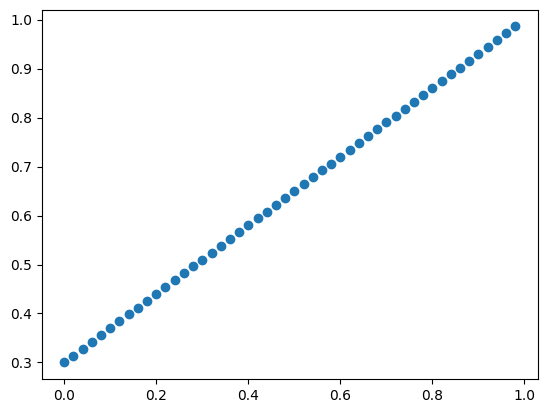

In [22]:
plt.scatter(X, y)
plt.show()

In [23]:
def predict_1d(w, bias, X):
    return X*w + bias

In [24]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [25]:
def hypothesis(W, b, X):
    return X * W + b

In [26]:
np.random.seed(SEED)
w1 = np.random.randn(1)[0]
w0 = np.random.randn(1)[0]
print(w1, w0)

0.4967141530112327 -0.13826430117118466


In [27]:
print(mean_squared_error(y, predict_1d(w1, w0, X)))

0.29275121760471395


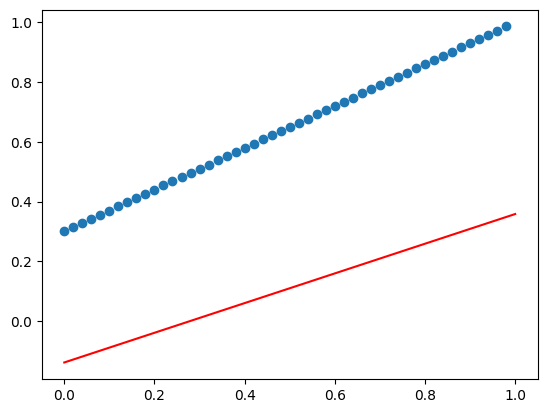

In [28]:
plt.scatter(X, y)
plt.plot(hypothesis(w1, w0, np.array([0, 1])), color="r")
plt.show()

Remember our update rule is:

$\large
w_0 \leftarrow w_0 + \alpha \sum_j (y_j - h_w(x_j)); 
w_1 \leftarrow w_1 + \alpha \sum_j (y_j - h_w(x_j)) \times x_j.
$ 

In [29]:
print(w0, w1)

-0.13826430117118466 0.4967141530112327


  0%|          | 0/100000 [00:00<?, ?it/s]

0.6753226142802671 -0.3519642383492627


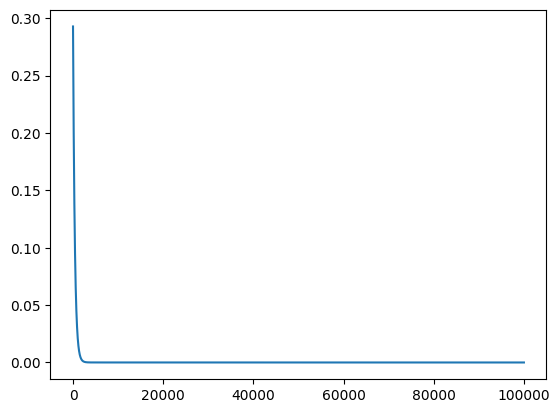

In [31]:
lr = 0.001

def d_w0(w0, w1, X, y):
    return sum((X*w1 + w0) - y)
    # return sum([yi - (xi*w1+w0) for xi, yi in zip(X, y)])

def d_w1(w0, w1, X, y):
    return sum(((X*w1 + w0) - y) * X)
    # return sum([(yi - (xi*w1+w0)) * xi for xi, yi in zip(X, y)])


values = []
for i in tqdm(range(100000)):
    values.append(mean_squared_error(y, predict_1d(w1, w0, X)))
    w0 -= lr * d_w0(w0, w1, X, y) / len(X)
    w1 -= lr * d_w1(w0, w1, X, y) / len(X)
values.append(mean_squared_error(y, predict_1d(w1, w0, X)))

print(x1, x2)
plt.plot(values)
plt.show()

In [32]:
print(mean_squared_error(y, predict_1d(w1, w0, X)))

6.37914038022683e-11


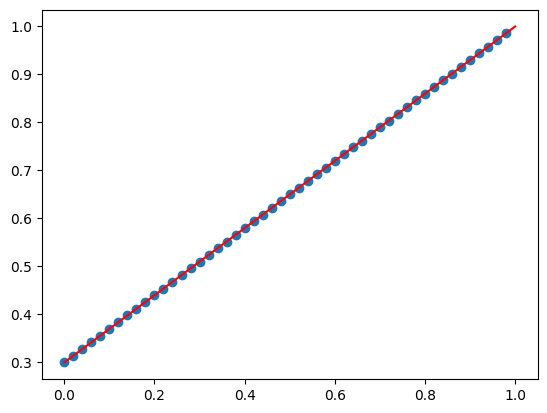

In [33]:
plt.scatter(X, y)
plt.plot(hypothesis(w1, w0, np.array([0, 1])), color="r")
plt.show()

### Multivariable linear regression

We can easily extend to multivariable linear regression problems, in which each example Multivariable linear
regression
$x_j$ is an n-element vector. Our hypothesis space is the set of functions of the form

$\large
h_w(\mathbf{x}_j) = w_0 + w_1 x_{j,1} + \cdots + w_n x_{j,n} = w_0 + \sum_i w_i x_{j,i}.
$ 

The $ w_0 $ term, the intercept, stands out as different from the others. We can fix that by inventing a dummy input attribute, $ x_{j,0} $, which is defined as always equal to 1. Then $ h $ is simply the dot product of the weights and the input vector (or equivalently, the matrix product of the transpose of the weights and the input vector):

$\large
h_w(\mathbf{x}_j) = \mathbf{w} \cdot \mathbf{x}_j = \mathbf{w}^\top \mathbf{x}_j = \sum_i w_i x_{j,i}.
$ 

The best vector of weights, $ \mathbf{w}^* $, minimizes squared-error loss over the examples:

$\large
\mathbf{w}^* = \arg\min_{\mathbf{w}} \sum_j L_2(y_j, \mathbf{w} \cdot \mathbf{x}_j).
$

Multivariable linear regression is actually not much more complicated than the univariate case we just covered. Gradient descent will reach the (unique) minimum of the loss function; the update equation for each weight $ w_i $ is

$\large
w_i \leftarrow w_i + \alpha \sum_j (y_j - h_w(x_j)) \times x_{j,i}.
$

With the tools of linear algebra and vector calculus, it is also possible to solve analytically for the $ \mathbf{w} $ that minimizes loss. Let $ \mathbf{y} $ be the vector of outputs for the training examples, and $ \mathbf{X} $ be the **data matrix**—that is, the matrix of inputs with one $ n $-dimensional example per row. Then the vector of predicted outputs is $ \hat{\mathbf{y}} = \mathbf{Xw} $ and the squared-error loss over all the training data is

$\large
L(\mathbf{w}) = \|\hat{\mathbf{y}} - \mathbf{y}\|^2 = \|\mathbf{Xw} - \mathbf{y}\|^2.
$

We set the gradient to zero:

$\large
\nabla_\mathbf{w} L(\mathbf{w}) = 2\mathbf{X}^\top (\mathbf{Xw} - \mathbf{y}) = 0.
$

Rearranging, we find that the minimum-loss weight vector is given by

$\large
\mathbf{w}^* = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}.
$

We call the expression $ (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top $ the **pseudoinverse** of the data matrix is called the **normal equation**.

With univariate linear regression we didn’t have to worry about overfitting. But with multivariable linear regression in high-dimensional spaces it is possible that some dimension that is actually irrelevant appears by chance to be useful, resulting in overfitting.

Thus, it is common to use **regularization** on multivariable linear functions to avoid overfitting. Recall that with regularization we minimize the total cost of a hypothesis, counting both the empirical loss and the complexity of the hypothesis:

$\large
Cost(h) = EmpLoss(h) + \lambda Complexity(h).
$

For linear functions the complexity can be specified as a function of the weights. We can consider a family of regularization functions:

$\large
Complexity(h_w) = L_q(w) = \sum_i |w_i|^q.
$

As with loss functions, with $ q = 1 $ we have $ L_1 $ regularization, which minimizes the sum of the absolute values; with $ q = 2 $, $ L_2 $ regularization minimizes the sum of squares.

# Linear Regression

In [35]:
X, y = datasets.make_regression(
        n_samples=50, n_features=1, noise=20, random_state=4, 
    )

In [36]:
print(X.shape, y.shape)

(50, 1) (50,)


In [37]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).squeeze()

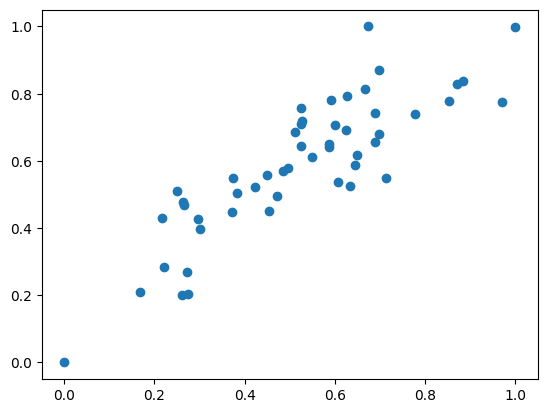

In [38]:
plt.scatter(X, y)

In [39]:
np.random.seed(SEED)
W = np.random.randn(1)[0]
b = np.random.randn(1)[0]
print(W, b)

0.4967141530112327 -0.13826430117118466


In [41]:
def predict(weights, bias, X):
    return np.dot(X, weights) + bias

In [42]:
print(mean_squared_error(y, predict(W, b, X)))

0.27157762601316876


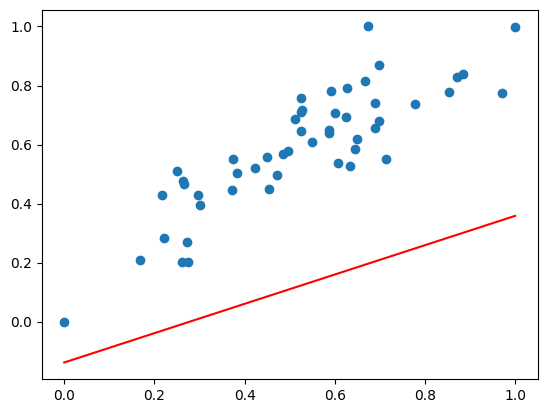

In [43]:
plt.scatter(X, y)
plt.plot(hypothesis(W, b, np.array([0, 1])) , color='r')
plt.show()

In [48]:
def linearRegression(X, y, n_iters = 1000, learning_rate=0.1, visualize = False):

    if visualize:
        scatter_out = Output()
        loss_out = Output()
        all_outs = HBox([scatter_out, loss_out])
        display(all_outs)

    n_samples, n_features = X.shape
    weights = np.random.normal(0.0, 1.0, n_features)
    bias = 1
    losses = []

    for i in tqdm(range(n_iters)):
        y_predicted = np.dot(X, weights) + bias
        
        losses.append(mean_squared_error(y, y_predicted))
        
        # compute gradients slow
        # dw = np.zeros(n_features)
        # for n in range(n_samples):
        #    for d in range(n_features):
        #        dw[d] -= (y[n] - y_predicted[n]) * X[n, d]
        # dw /= n_samples
        # db = 0
        # for j in range(len(y)):
        #    db -= (y[j] - y_predicted[j]) * 1
        # db /= n_samples

        # compute gradients fast
        # dw.shape: D, db.shape: 1
        # x.shape: N x D
        # X.T.shape: D X N
        # (y_predicted - y).shape: N
        # X.T @ (y_predicted - y)
        # D x N @ N -> D
        dw =  np.dot(X.T, (y_predicted - y)) / n_samples
        # print(dw.shape)
        db =  np.sum(y_predicted - y) / n_samples
        # print(db.shape)
        # update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if visualize and i % 100 ==0:
            with scatter_out:
                clear_output(wait=True)
                plt.scatter(X, y)
                plt.plot(hypothesis(weights, bias, np.array([0, 1])) , color='r')
                plt.title('Hypothesis')
                plt.show(block=False)
            
            with loss_out:
                clear_output(wait=True)
                plt.plot(losses)
                plt.title('Loss curve')
                plt.show(block=False)
    return weights, bias


In [49]:
W, b = linearRegression(X, y, visualize = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

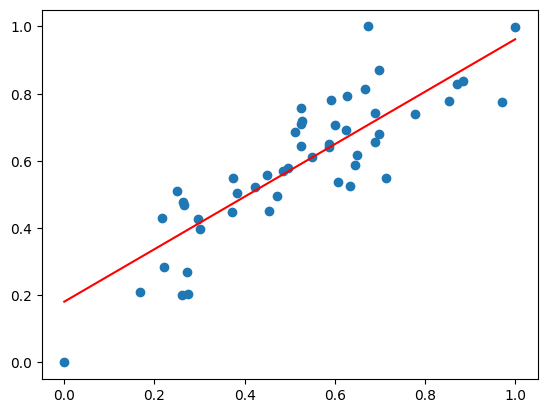

In [50]:
plt.scatter(X, y)
plt.plot(hypothesis(W, b, np.array([0, 1])), color='r')
plt.show()

In [51]:
print(mean_squared_error(y, predict(W, b, X)))

0.011040672766154034


In [52]:
diabetes_dataset = load_diabetes()

In [53]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Lets show this generalizes to higher dimensions and on real data. 

In [54]:
X, y = diabetes_dataset['data'], diabetes_dataset['target']

In [59]:
# print(y)

In [87]:
print(X[0])

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [60]:
print(X.shape, y.shape)

(442, 10) (442,)


In [61]:
print(X[0], y[0])

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613] 151.0


In [63]:
np.random.seed(SEED)
W = np.random.randn(10)
b = np.random.randn(1)[0]
print(W, b)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004] -0.46341769281246226


In [64]:
print(mean_squared_error(y, predict(W, b, X)))

29210.597512070308


In [65]:
W, b = linearRegression(X, y, visualize = False)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [66]:
print(mean_squared_error(y, predict(W, b, X)))

3942.9910633048116


In [67]:
W, b = linearRegression(X, y, visualize = False)

  0%|          | 0/1000 [00:00<?, ?it/s]

# logistic Regression

Linear functions can be used to do classification as well as regression. To do so we will use the Sigmoid which is also called the logistic function

$\large
\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
$

has more convenient mathematical properties. With the logistic function we now have

$\large
h_w(\mathbf{x}) = \text{Sigmoid}(\mathbf{w} \cdot \mathbf{x}) = \frac{1}{1 + e^{-\mathbf{w} \cdot \mathbf{x}}}.
$

The Sigmoid is often written as $\sigma $ for short

$ \sigma(x) = \frac{1}{1 + e^{-x}} $

$ \sigma'(x) = \sigma(x) \cdot (1 - \sigma(x)) $

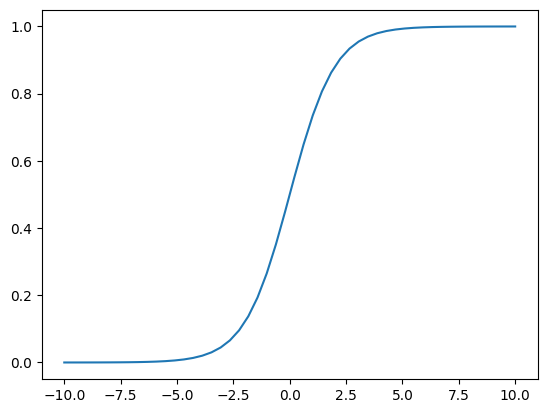

In [68]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.show()

Notice that the output, being a number between 0 and 1, can be interpreted as a *probability* of belonging to the class labeled 1. The hypothesis forms a soft boundary in the input space and gives a probability of 0.5 for any input at the center of the boundary region, and approaches 0 or 1 as we move away from the boundary.

The process of fitting the weights of this model to minimize loss on a data set is called **logistic regression**.

### Cross Entropy Definition

Cross entropy between two probability distributions $ p $ (the true distribution) and $ q $ (the estimated distribution) over a given set of events is defined as:

$
H(p, q) = -\sum_{i} p(i) \log q(i) 
$

Where:

- $ p(i) $ is the true probability of event $ i $.
- $ q(i) $ is the probability of event $ i $ predicted by the model.
- The summation is over all possible events.

Cross-entropy measures the expected number of bits required to transmit a result from a random experiment if instead of the actual distribution function of the random variable $ p(i) $, to encode
the distribution function we use $ q(i) $.

### Application in Machine Learning

In the context of machine learning, particularly in binary and multi-class classification, cross entropy is used as a loss function to evaluate how well the predicted probabilities match the actual outcomes (often referred to as true labels).

#### Binary Cross Entropy

For binary classification, the cross-entropy loss can be simplified to:

$
H(p, q) = -\sum_y[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$

Where:

- $ y $ is the true binary label (0 or 1).
- $ \hat{y} $ is the predicted probability of the label being 1.

#### Categorical Cross Entropy

For multi-class classification, the categorical cross-entropy loss generalizes the above concept. If there are $ C $ classes, the loss for a single data point is:

$
H(p, q) = -\sum_{c=1}^{C} y_c \log(\hat{y}_c) 
$

Where:

- $ C $ is the number of classes.
- $ y_c $ is a binary indicator (0 or 1) if class label $ c $ is the correct classification for the observation.
- $ \hat{y}_c $ is the predicted probability of the class $ c $.


For the binary case the derivative to the loss is:

$\large
\frac{\partial}{\partial w_i} Loss(w) = \frac{\partial}{\partial w_i} (y - h_w(x))^2 = 2(y - h_w(x)) \times \frac{\partial}{\partial w_i} (y - h_w(x))
$ 

For the binary case the derivative to the loss is:

$\large
\frac{\partial}{\partial w_i} Loss(w) = \frac{\partial}{\partial w_i} (y\log(h_w(x)) + (1 - y) \log(1 - h_w(x))) = (y - h_w(x)) \times x_i
$ 

$\large
\frac{\partial}{\partial w_0} Loss(w) = \frac{\partial}{\partial w_0} (y\log(h_w(x)) + (1 - y) \log(1 - h_w(x))) = (y - h_w(x))
$ 


So the update rule is:

$\large
w_0 \leftarrow w_0 + \alpha \sum_j (y_j - h_w(x_j)); 
w_i \leftarrow w_i + \alpha \sum_j (y_j - h_w(x_j)) \times x_{j, i}.
$ 

In [69]:
def cross_entropy(y_true, y_pred):
    return -np.mean((1-y_true) * np.log(1-y_pred + 1e-8) + y_true * np.log(y_pred + 1e-8))

In [71]:
print(cross_entropy(np.array([1, 0]), np.array([0.1, 0.9])))

2.302584992994051


In [73]:
print(cross_entropy(np.array([1, 0]), np.array([0.6, 0.4])))

0.5108256070993241


In [74]:
print(cross_entropy(np.array([1, 0]), np.array([0.99, 0.01])))

0.01005032575249135


In [75]:
print(cross_entropy(np.array([1, 0]), np.array([1, 0])))

-9.999999889225291e-09


In [77]:
def graph(W, b, range):  
    x = np.array(range)  
    y = (- b -W[0] * x) / (W[1] + 1e-8)
    plt.plot(x, y)

In [78]:
X, y = make_blobs(n_samples=40, centers=2, n_features=2, cluster_std=5, random_state=11)
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).squeeze()

In [79]:
print(X.shape, y.shape)

(40, 2) (40,)


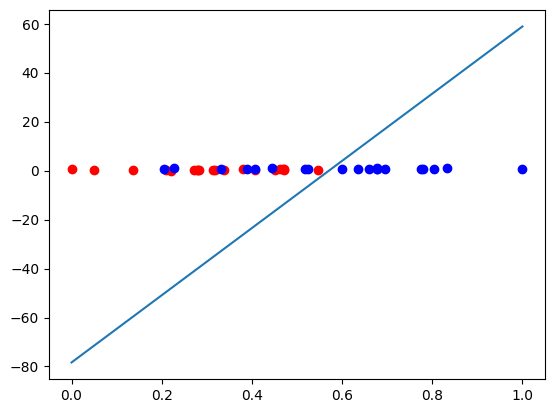

In [80]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='r')
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='b')
W = np.random.randn(2)
b = np.random.randn(1)
graph(W, b, [0, 1])

In [83]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [85]:
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred =  sigmoid(logits)
    return [1 if i > 0.5 else 0 for i in y_pred]

The update rule is:


$\large
w_0 \leftarrow w_0 + \alpha \sum_j (y_j - h_w(x_j)); 
w_i \leftarrow w_i + \alpha \sum_j (y_j - h_w(x_j)) \times x_{j, i}.
$

In [86]:
def logisticRegression(X, y, n_iters = 2000, learning_rate=0.1, visualize = False):

    if visualize:
        scatter_out = Output()
        loss_out = Output()
        all_outs = HBox([scatter_out, loss_out])
        display(all_outs)

    n_samples, n_features = X.shape
    weights = np.random.normal(0.0, 1.0, n_features)
    bias = 1
    losses = []

    for i in tqdm(range(n_iters)):
        logits = np.dot(X, weights) + bias
        y_predicted = sigmoid(logits)
        losses.append(cross_entropy(y, y_predicted))
        # compute gradients
        dw =  np.dot(X.T, y_predicted - y) / n_samples
        # print(dw.shape)
        db = np.sum((y_predicted - y)) / n_samples
        # print(db.shape)
        # update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if visualize and i % 100 ==0 :
            with scatter_out:
                clear_output(wait=True)
                plt.scatter(X[:,0][y==0], X[:,1][y==0], c='r')
                plt.scatter(X[:,0][y==1], X[:,1][y==1], c='b')
                graph(weights, bias, [0, 1])
                plt.title('Hypothesis')
                plt.show(block=False)
            
            with loss_out:
                clear_output(wait=True)
                plt.plot(losses)
                plt.title('Loss curve')
                plt.show(block=False)
    
    return weights, bias


In [90]:
W, b = logisticRegression(X, y,n_iters = 20000, learning_rate=0.01, visualize=True)

  0%|          | 0/20000 [00:00<?, ?it/s]

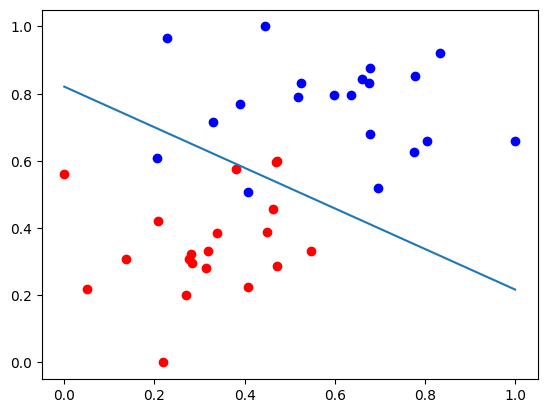

In [89]:
plt.scatter(X[:,0][y==0], X[:,1][y==0], c='r')
plt.scatter(X[:,0][y==1], X[:,1][y==1], c='b')
graph(W, b, [0, 1])

In [91]:
print(accuracy(predict(X, W, b) , y))

0.9


In [92]:
X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ]
)

In [93]:
# AND
Y_and = np.array([0, 0, 0, 1])
W, b = logisticRegression(X, Y_and)
accuracy(predict(X, W, b), Y_and)

  0%|          | 0/2000 [00:00<?, ?it/s]

np.float64(1.0)

In [94]:

# XOR
Y_xor = np.array([0, 1, 1, 0])
W, b = logisticRegression(X, Y_xor)
print(accuracy(predict(X, W, b), Y_xor))

  0%|          | 0/2000 [00:00<?, ?it/s]

0.75


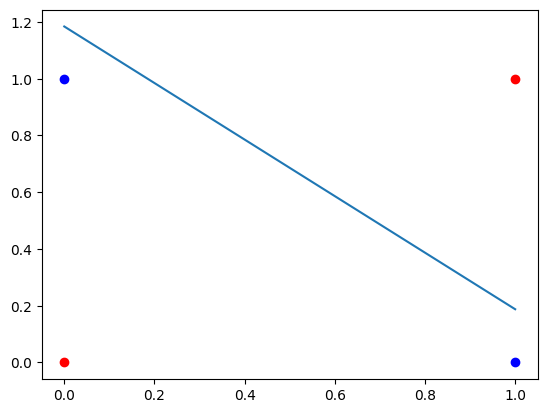

In [95]:
plt.scatter(X[:,0][Y_xor==0], X[:,1][Y_xor==0], c='r')
plt.scatter(X[:,0][Y_xor==1], X[:,1][Y_xor==1], c='b')
graph(W, b, [0, 1])
plt.show()